In [12]:
import glob
import subprocess
from tqdm import tqdm
import multiprocessing
from time import sleep
import random

def gulp(input_path):
    sleep(random.random())
    run = True
    output_path = input_path[:-3] + 'out'
    try:
        with open(output_path) as f:
            file = f.read()
        if 'Job Finished at' in file:
            run = False
    except:
        pass
    if run:
        with open(input_path) as f:
            output_path = input_path[:-3] + 'out'
            with open(output_path, 'w') as o:
                try:
                    a = subprocess.run(['gulp'], stdin = f, stdout = o, timeout = 900)
                except:
                    pass

all_cases = sorted(glob.glob('*.inp'), key = lambda x: x.split('/')[-1].split('.')[0])

complete = []

for case in all_cases:
    try:
        with open(case[:-3] + 'out', 'r') as f:
            g = f.read()
        if 'Final energy' in g:
            complete.append(case)
    except:
        pass

cases = [case for case in all_cases if case not in complete]

N = len(cases)

def update():
    pbar.update(1)

if __name__ == '__main__':
    with multiprocessing.Pool() as pool:
        for result in tqdm(pool.imap_unordered(gulp, cases), total=len(cases)):
            pass
    pool.close()
    pool.join()

100%|██████████| 8/8 [02:26<00:00, 18.27s/it]


In [15]:
import re
import glob

def getEnergy(path):
    with open(path) as file:
        content = file.readlines()
    for line in content:
        if "Final defect energy" in line:
            return float(re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", line)[0])

def getLatticeEnergy(path):
    with open(path) as file:
        content = file.readlines()
    for line in content:
        if "Final energy" in line:
            return float(re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", line)[0])

def energyList(data):
    files = glob.glob(data)
    energies = dict()
    for f in files:
        energies[f] = getEnergy(f)
    return energies
        
def latticeEnergy(data):
    lattice_energy = getLatticeEnergy(data)
    return lattice_energy

energies = energyList('*.out')
lattice_energy = latticeEnergy('na3ocl_na_vac.out')

na2o = latticeEnergy('ana2o.out') #lattice parameter fromm chemtube3d.com (fluorite)
nacl = latticeEnergy('anacl.out') #lattice parameter from worksheet (rocksalt)
mgo = latticeEnergy('amgo.out') #lattice parameter from crystec.de (rocksalt)
mgcl2 = latticeEnergy('amgcl2.out') #lattice parameter from materialsproject.org
cao = latticeEnergy('acao.out') #lattice parameter from ucl.ac.uk (rocksalt)
cacl2 = latticeEnergy('acacl2.out') / 2 #lattice parameter from materialsproject.org
sro = latticeEnergy('asro.out') #lattice parameter from ucl.ac.uk (rocksalt)
srcl2 = latticeEnergy('asrcl2.out') #lattice parameter from materialsproject.org (fluorite)
bao = latticeEnergy('abao.out') #lattice parameter from ucl.ac.uk (rocksalt)
bacl2 = latticeEnergy('abacl2.out') #lattice parameter from materialsproject.org (fluorite)

magic = open('/home/ben/Documents/gulp_calcs/0_summary/output_na3ocl_khandy.txt', 'w+')

magic.write("Calculations on Na3OCl anti-perovskite:")
magic.write("\n")
magic.write("***************************************")
magic.write("\n")
magic.write("\n")
magic.write("Na vacancy defect energy: " + str(round(energies['na3ocl_na_vac.out'], 2)) + " eV" + "\n")
magic.write("Na vacancy migration barrier: " + str(round((energies['na3ocl_na_vmig.out'] - energies['na3ocl_na_vac.out']), 2)) + " eV" + "\n")
magic.write("Na interstitial defect energy: " + str(round(energies['na3ocl_na_int.out'], 2)) + " eV" + "\n")
magic.write("\n")
magic.write("O vacancy defect energy: " + str(round(energies['na3ocl_o_vac.out'], 2)) + " eV" + "\n")
magic.write("O interstitial defect energy: " + str(round(energies['na3ocl_o_int.out'], 2)) + " eV" + "\n")
magic.write("\n")
magic.write("Cl vacancy defect energy: " + str(round(energies['na3ocl_cl_vac.out'], 2)) + " eV" + "\n")
magic.write("Cl interstitial defect energy: " + str(round(energies['na3ocl_cl_int.out'], 2)) + " eV" + "\n")
magic.write("\n")
magic.write("Mg impurity on Na defect energy: " + str(round(energies['na3ocl_mg_dop.out'], 2)) + " eV" + "\n")
magic.write("Ca impurity on Na defect energy: " + str(round(energies['na3ocl_ca_dop.out'], 2)) + " eV" + "\n")
magic.write("Sr impurity on Na defect energy: " + str(round(energies['na3ocl_sr_dop.out'], 2)) + " eV" + "\n")
magic.write("Ba impurity on Na defect energy: " + str(round(energies['na3ocl_ba_dop.out'], 2)) + " eV" + "\n")
magic.write("\n")
magic.write("Mg impurity and Na vacancy energy: " + str(round(energies['na3ocl_mg_clu.out'], 2)) + " eV" + "\n")
magic.write("Ca impurity and Na vacancy energy: " + str(round(energies['na3ocl_ca_clu.out'], 2)) + " eV" + "\n")
magic.write("Sr impurity and Na vacancy energy: " + str(round(energies['na3ocl_sr_clu.out'], 2)) + " eV" + "\n")
magic.write("Ba impurity and Na vacancy energy: " + str(round(energies['na3ocl_ba_clu.out'], 2)) + " eV" + "\n")
magic.write("\n")
magic.write("Na3OCl Schottky defect energy: " + str(round((energies['na3ocl_na_vac.out'] * 3 + energies['na3ocl_o_vac.out'] + energies['na3ocl_cl_vac.out'] + lattice_energy), 2)) + " eV" + "\n")
magic.write("NaCl partial Schottky defect energy: " + str(round((energies['na3ocl_na_vac.out'] + energies['na3ocl_cl_vac.out'] + nacl), 2)) + " eV" + "\n")
magic.write("Na2O partial Schottky defect energy: " + str(round((energies['na3ocl_na_vac.out'] * 2 + energies['na3ocl_o_vac.out'] + na2o), 2)) + " eV" + "\n")
magic.write("Na Frenkel defect energy: " + str(round((energies['na3ocl_na_vac.out'] + energies['na3ocl_na_int.out']), 2)) + " eV" + "\n")
magic.write("O Frenkel defect energy: " + str(round((energies['na3ocl_o_vac.out'] + energies['na3ocl_o_int.out']), 2)) + " eV" + "\n")
magic.write("Cl Frenkel defect energy: " + str(round((energies['na3ocl_cl_vac.out'] + energies['na3ocl_cl_int.out']), 2)) + " eV" + "\n")
magic.write("\n")
magic.write("MgCl2 on Na doping defect energy: " + str(round((energies['na3ocl_na_vac.out'] + energies['na3ocl_mg_dop.out'] + nacl * 2 - mgcl2), 2)) + " eV" + "\n")
magic.write("MgO on Na doping defect energy: " + str(round((energies['na3ocl_na_vac.out'] + energies['na3ocl_mg_dop.out'] + na2o - mgo), 2)) + " eV" + "\n")
magic.write("Mg impurity and Na vacancy clustering energy: " + str(round((energies['na3ocl_mg_clu.out'] - energies['na3ocl_mg_dop.out'] - energies['na3ocl_na_vac.out']), 2)) + " eV" + "\n")
magic.write("CaCl2 on Na doping defect energy: " + str(round((energies['na3ocl_na_vac.out'] + energies['na3ocl_ca_dop.out'] + nacl * 2 - cacl2), 2)) + " eV" + "\n")
magic.write("CaO on Na doping defect energy: " + str(round((energies['na3ocl_na_vac.out'] + energies['na3ocl_ca_dop.out'] + na2o - cao), 2)) + " eV" + "\n")
magic.write("Ca impurity and Na vacancy clustering energy: " + str(round((energies['na3ocl_ca_clu.out'] - energies['na3ocl_ca_dop.out'] - energies['na3ocl_na_vac.out']), 2)) + " eV" + "\n")
magic.write("SrCl2 on Na doping defect energy: " + str(round((energies['na3ocl_na_vac.out'] + energies['na3ocl_sr_dop.out'] + nacl * 2 - srcl2), 2)) + " eV" + "\n")
magic.write("SrO on Na doping defect energy: " + str(round((energies['na3ocl_na_vac.out'] + energies['na3ocl_sr_dop.out'] + na2o - sro), 2)) + " eV" + "\n")
magic.write("Sr impurity and Na vacancy clustering energy: " + str(round((energies['na3ocl_sr_clu.out'] - energies['na3ocl_sr_dop.out'] - energies['na3ocl_na_vac.out']), 2)) + " eV" + "\n")
magic.write("BaCl2 on Na doping defect energy: " + str(round((energies['na3ocl_na_vac.out'] + energies['na3ocl_ba_dop.out'] + nacl * 2 - bacl2), 2)) + " eV" + "\n")
magic.write("BaO on Na doping defect energy: " + str(round((energies['na3ocl_na_vac.out'] + energies['na3ocl_ba_dop.out'] + na2o - bao), 2)) + " eV" + "\n")
magic.write("Ba impurity and Na vacancy clustering energy: " + str(round((energies['na3ocl_ba_clu.out'] - energies['na3ocl_ba_dop.out'] - energies['na3ocl_na_vac.out']), 2)) + " eV" + "\n")
magic.write("\n")
magic.write("Lattice energy of Na3OCl (from calculations): " + str(round(lattice_energy, 2)) + " eV" + "\n")
magic.write("Lattice energy of NaCl (from calculations): " + str(round(nacl, 2)) + " eV" + "\n")
magic.write("Lattice energy of Na2O (from calculations): " + str(round(na2o, 2)) + " eV" + "\n")
magic.write("Lattice energy of MgO (from calculations): " + str(round(mgo, 2)) + " eV" + "\n")
magic.write("Lattice energy of MgCl2 (from calculations): " + str(round(mgcl2, 2)) + " eV" + "\n")
magic.write("Lattice energy of CaO (from calculations): " + str(round(cao, 2)) + " eV" + "\n")
magic.write("Lattice energy of CaCl2 (from calculations): " + str(round(cacl2, 2)) + " eV" + "\n")
magic.write("Lattice energy of SrO (from calculations): " + str(round(sro, 2)) + " eV" + "\n")
magic.write("Lattice energy of SrCl2 (from calculations): " + str(round(srcl2, 2)) + " eV" + "\n")
magic.write("Lattice energy of BaO (from calculations): " + str(round(bao, 2)) + " eV" + "\n")
magic.write("Lattice energy of BaCl2 (from calculations): " + str(round(bacl2, 2)) + " eV" + "\n")

magic.close()

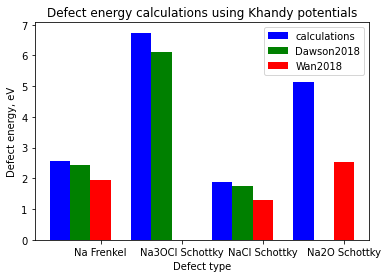

In [11]:
import numpy as np
import matplotlib.pyplot as plt

labels = ['Na Frenkel', 'Na3OCl Schottky', 'NaCl Schottky', 'Na2O Schottky']

calculations = [(energies['na3ocl_na_vac.out'] + energies['na3ocl_na_int.out']), 
                (energies['na3ocl_na_vac.out'] * 3 + energies['na3ocl_o_vac.out'] + energies['na3ocl_cl_vac.out'] + lattice_energy), 
                (energies['na3ocl_na_vac.out'] + energies['na3ocl_cl_vac.out'] + nacl), 
                (energies['na3ocl_na_vac.out'] * 2 + energies['na3ocl_o_vac.out'] + na2o)]
dawson2018 = [2.45, 6.10, 1.75, 0]
wan2015 = [1.94, 0, 1.28, 2.52]

plt.bar(np.arange(len(calculations))-0.25, calculations, color='blue', tick_label=labels, width=0.25)
plt.bar(np.arange(len(calculations)), dawson2018, color='green', tick_label=labels, width=0.25)
plt.bar(np.arange(len(calculations))+0.25, wan2015, color='red', tick_label=labels, width=0.25)
plt.xlabel('Defect type')
plt.ylabel('Defect energy, eV')
plt.legend(labels=['calculations', 'Dawson2018', 'Wan2018'])
plt.title('Defect energy calculations using Khandy potentials')
plt.savefig('/home/ben/Documents/gulp_calcs/0_summary/bar_na3ocl_khandy_defects.jpg', bbox_inches='tight', dpi=500)

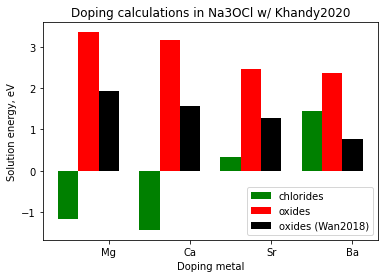

In [19]:
import numpy as np
import matplotlib.pyplot as plt
subscript = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")

metals = ['mg', 'ca', 'sr', 'ba']

labels = ['Mg', 'Ca', 'Sr', 'Ba']
cl_solution_energies = []
o_solution_energies = []
experimental = [1.93, 1.56, 1.28, 0.77]

for i in metals:
    mcl2 = latticeEnergy('a' + i + 'cl2.out')
    if i == 'ca':
        mcl2 = mcl2 / 2
    cl_solution_energies.append(energies['na3ocl_na_vac.out'] + energies['na3ocl_' + i + '_dop.out'] + nacl * 2 - mcl2)
    
for i in metals:
    mo = latticeEnergy('a' + i + 'o.out')
    o_solution_energies.append(energies['na3ocl_na_vac.out'] + energies['na3ocl_' + i + '_dop.out'] + na2o - mo)

plt.bar(np.arange(len(metals))-0.25, cl_solution_energies, color='green', tick_label=labels, width=0.25)
plt.bar(np.arange(len(metals)), o_solution_energies, color='red', tick_label=labels, width=0.25)
plt.bar(np.arange(len(metals))+0.25, experimental, color='black', tick_label=labels, width=0.25)
plt.xlabel('Doping metal')
plt.ylabel('Solution energy, eV')
plt.legend(labels=['chlorides', 'oxides', 'oxides (Wan2018)'])
plt.title('Doping calculations in Na3OCl w/ Khandy2020')
plt.savefig('/home/ben/Documents/gulp_calcs/0_summary/bar_na3ocl_doping_khandy.jpg', bbox_inches='tight', dpi=500)

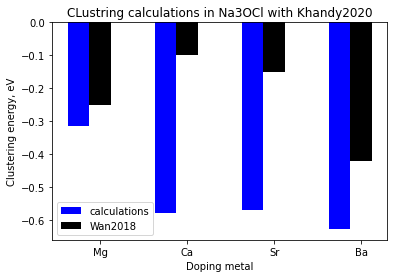

In [20]:
import numpy as np
import matplotlib.pyplot as plt
subscript = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")

metals = ['mg', 'ca', 'sr', 'ba']

labels = ['Mg', 'Ca', 'Sr', 'Ba']
clustering_energies = []
literature = [-0.25, -0.1, -0.15, -0.42]

for i in metals:
    clustering_energies.append(energies[f'na3ocl_{i}_clu.out'] - energies[f'na3ocl_{i}_dop.out'] - energies['na3ocl_na_vac.out'])

plt.bar(np.arange(len(metals))-0.125, clustering_energies, color='blue', tick_label=labels, width=0.25)
plt.bar(np.arange(len(metals))+0.125, literature, color='black', tick_label=labels, width=0.25)
plt.xlabel('Doping metal')
plt.ylabel('Clustering energy, eV')
plt.legend(labels=['calculations', 'Wan2018'])
plt.title('CLustring calculations in Na3OCl with Khandy2020')
plt.savefig('/home/ben/Documents/gulp_calcs/0_summary/bar_na3ocl_clustering_khandy.jpg', bbox_inches='tight', dpi=500)